In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [18]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Using the formula to calculate b1 and b2 which y = mx + c, m = ∑(x - x̅)*(y - ȳ)/∑(x - x̅)^2
numer = 0
denom = 0
for i in range(n):
    # ∑(x - x̅)̅)*(y - ȳ)
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    # ∑(x - x̅)^2
    denom += (X[i] - mean_x) ** 2
    
# m = ∑(x - x̅)*(y - ȳ)/∑(x - x̅)^2
m = numer / denom

# c = y - m
c = mean_y - (b1*mean_x)

#print Coefficients
print(m, c)

0.26342933948939945 325.57342104944223


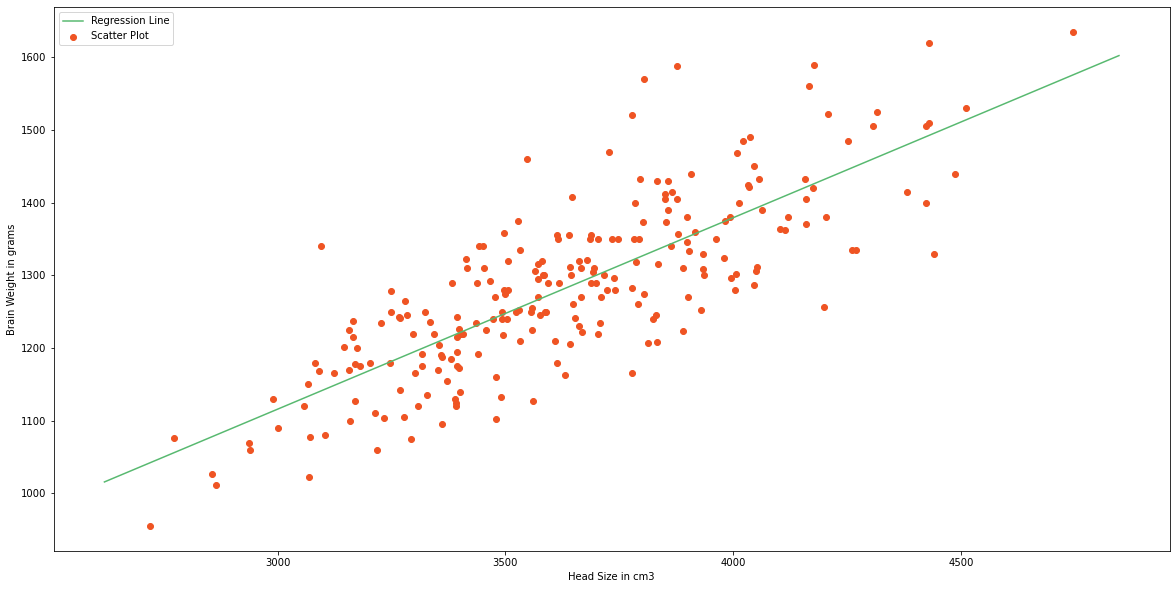

In [20]:
# Plotting Values and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100


# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = m*x + c 

# Ploting Line
# (x, y)
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [26]:
# Checking Goodness of fit or to check how good a model has peroformed 
# we'll be using R-square method also known as coefficient of determination
# R^2 = 1 - Distance of predicted - mean/Distance actual - mean
# R^2 = 1-  ∑(Yp - ȳ)^2 / ∑(Ya - ȳ)^2

ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
R_square = 1 - (ss_r/ss_t)
print(R_square)

0.6393117199570003


R^2 = 1 - \frac{RSS}{TSS}
R^2	=	coefficient of determination
RSS	=	sum of squares of residuals
TSS	=	total sum of squares

Now We'll be implementing same thing using scikit learn library as we'll see how much we code we can reduce

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape(n, 1)
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating R2 Score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
